<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 계층적 클러스터

모든 데이터를 단일 클러스터로 가정하고, 거리행렬을 계산하여 가장 가까운 두 클러스트를 합친후 유사도 행렬을 업데이트하는 방식을 차용

In [0]:
# dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [0]:
#거리행렬 계산
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')), columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [0]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [0]:
row_clusters = linkage(pdist(df, metric = 'euclidean'), method = 'complete')

In [0]:
pd.DataFrame(row_clusters, columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust'],
                                       index = ['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


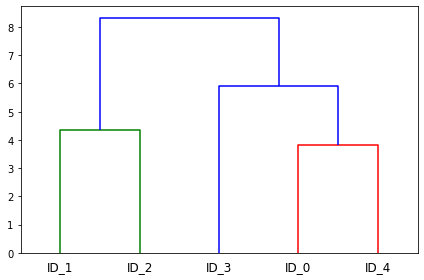

In [0]:
# 검은색 덴드로그램 만들기
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.show()

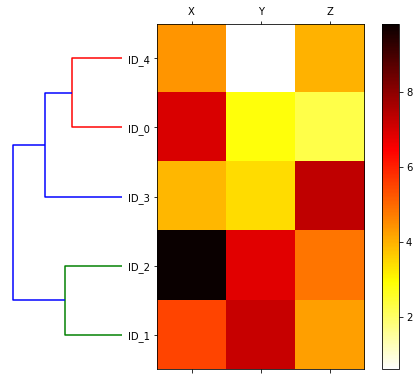

In [0]:
# 히트맵과 덴드로그램을 동시에 플로팅
fig = plt.figure(figsize = (8,8), facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation = 'left')

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation = 'nearest', cmap = 'hot_r')

axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
  i.set_visible(False)

fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

## 사이킷런 활용

In [0]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(X)

print(labels)

[1 0 0 2 1]


# DBSCAN을 이용한 밀집도 분석

핵심샘플, 경계샘플, 잡음샘플

핵심샘플 - 특정반경 내 & 지정된 개수 이상

경계샘플 - 특정반경 내 & 지정된 개수 이하

잡음샘플 - 나머지

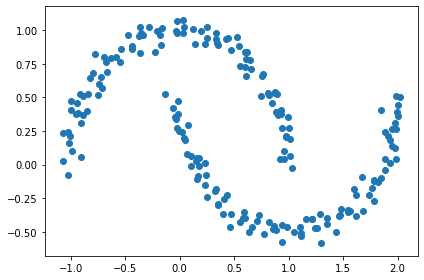

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

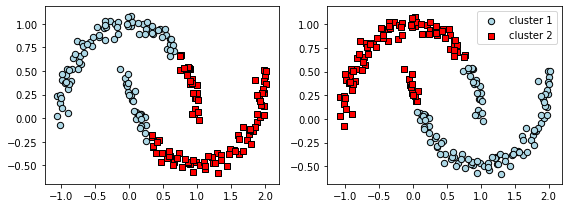

In [0]:
# k-means method는 반달모양의 데이터셋은 처리하지 못한다...

from sklearn.cluster import KMeans
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,3))

km = KMeans(n_clusters = 2, random_state = 0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c = 'lightblue', edgecolor = 'black', marker = 'o', s = 40)
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c = 'red', edgecolor = 'black', marker = 's', s = 40)

ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c = 'lightblue', edgecolor = 'black', marker = 'o', s = 40, label = 'cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c = 'red', edgecolor = 'black', marker = 's', s = 40, label = 'cluster 2')

plt.legend()
plt.tight_layout()
plt.show()

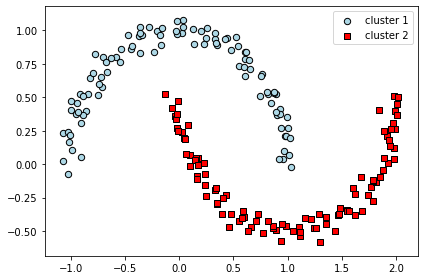

In [0]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c = 'lightblue', edgecolor = 'black', marker = 'o', s = 40, label = 'cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c = 'red', edgecolor = 'black', marker = 's', s = 40, label = 'cluster 2')

plt.legend()
plt.tight_layout()
plt.show()